In [559]:
import pandas as pd
import numpy as np
import math

In [560]:
ls

answers.txt  sample.py      spambase.names
code.ipynb   spambase.data  Untitled.ipynb


In [561]:
d = 58 # 57 input attributes + 1 target label

labels = ['f' + str(i) for i in range(1, d)]
labels.append('t')

labels

['f1',
 'f2',
 'f3',
 'f4',
 'f5',
 'f6',
 'f7',
 'f8',
 'f9',
 'f10',
 'f11',
 'f12',
 'f13',
 'f14',
 'f15',
 'f16',
 'f17',
 'f18',
 'f19',
 'f20',
 'f21',
 'f22',
 'f23',
 'f24',
 'f25',
 'f26',
 'f27',
 'f28',
 'f29',
 'f30',
 'f31',
 'f32',
 'f33',
 'f34',
 'f35',
 'f36',
 'f37',
 'f38',
 'f39',
 'f40',
 'f41',
 'f42',
 'f43',
 'f44',
 'f45',
 'f46',
 'f47',
 'f48',
 'f49',
 'f50',
 'f51',
 'f52',
 'f53',
 'f54',
 'f55',
 'f56',
 'f57',
 't']

In [562]:
data = pd.read_csv('spambase.data', header = None)

data.columns = labels

In [563]:
data.head(10)

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f49,f50,f51,f52,f53,f54,f55,f56,f57,t
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
5,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1
6,0.00,0.00,0.00,0.0,1.92,0.00,0.00,0.00,0.00,0.64,...,0.00,0.054,0.0,0.164,0.054,0.000,1.671,4,112,1
7,0.00,0.00,0.00,0.0,1.88,0.00,0.00,1.88,0.00,0.00,...,0.00,0.206,0.0,0.000,0.000,0.000,2.450,11,49,1
8,0.15,0.00,0.46,0.0,0.61,0.00,0.30,0.00,0.92,0.76,...,0.00,0.271,0.0,0.181,0.203,0.022,9.744,445,1257,1
9,0.06,0.12,0.77,0.0,0.19,0.32,0.38,0.00,0.06,0.00,...,0.04,0.030,0.0,0.244,0.081,0.000,1.729,43,749,1


In [564]:
target = data['t']
data = data.drop(columns = 't')

In [565]:
data.head(10)

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191
5,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.0,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54
6,0.00,0.00,0.00,0.0,1.92,0.00,0.00,0.00,0.00,0.64,...,0.0,0.00,0.054,0.0,0.164,0.054,0.000,1.671,4,112
7,0.00,0.00,0.00,0.0,1.88,0.00,0.00,1.88,0.00,0.00,...,0.0,0.00,0.206,0.0,0.000,0.000,0.000,2.450,11,49
8,0.15,0.00,0.46,0.0,0.61,0.00,0.30,0.00,0.92,0.76,...,0.0,0.00,0.271,0.0,0.181,0.203,0.022,9.744,445,1257
9,0.06,0.12,0.77,0.0,0.19,0.32,0.38,0.00,0.06,0.00,...,0.0,0.04,0.030,0.0,0.244,0.081,0.000,1.729,43,749


In [566]:
target.head(10)

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: t, dtype: int64

In [567]:
# normalizing the feature values by dividing each column by its mean

for col in data.columns:
    column = data[col]
    
    mean = 0
    for val in column:
        mean += val
    mean = mean/(len(column) + 0.0)
    
    new_column = []
    
    for val in column:
        new_column.append(val / mean)
        
    data[col] = new_column     

In [568]:
data.head(10)

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57
0,0.000000,3.004489,2.280369,0.0,1.024907,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,2.891432,0.000000,0.000000,0.723488,1.169192,0.981329
1,2.008544,1.314464,1.781538,0.0,0.448397,2.919681,1.838754,0.664802,0.000000,3.926267,...,0.0,0.000000,0.949432,0.0,1.382535,2.374335,1.085035,0.985069,1.935875,3.628799
2,0.573870,0.000000,2.529784,0.0,3.939487,1.981212,1.663634,1.139661,7.105792,1.044220,...,0.0,0.259238,1.028552,0.0,1.025752,2.427098,0.226049,1.891741,9.296034,7.974181
3,0.000000,0.000000,0.000000,0.0,2.017786,0.000000,2.714351,5.983218,3.441868,2.631434,...,0.0,0.000000,0.985396,0.0,0.509160,0.000000,0.000000,0.681304,0.766683,0.674222
4,0.000000,0.000000,0.000000,0.0,2.017786,0.000000,2.714351,5.983218,3.441868,2.631434,...,0.0,0.000000,0.971010,0.0,0.501727,0.000000,0.000000,0.681304,0.766683,0.674222
5,0.000000,0.000000,0.000000,0.0,5.925244,0.000000,0.000000,17.569768,0.000000,0.000000,...,0.0,0.000000,1.603965,0.0,0.000000,0.000000,0.000000,0.577866,0.287506,0.190618
6,0.000000,0.000000,0.000000,0.0,6.149442,0.000000,0.000000,0.000000,0.000000,2.673203,...,0.0,0.000000,0.388404,0.0,0.609505,0.712301,0.000000,0.321871,0.076668,0.395356
7,0.000000,0.000000,0.000000,0.0,6.021329,0.000000,0.000000,17.854684,0.000000,0.000000,...,0.0,0.000000,1.481690,0.0,0.000000,0.000000,0.000000,0.471924,0.210838,0.172968
8,1.434674,0.000000,1.639015,0.0,1.953729,0.000000,2.626791,0.000000,10.214575,3.174429,...,0.0,0.000000,1.949214,0.0,0.672685,2.677723,0.497308,1.876909,8.529351,4.437160
9,0.573870,0.563342,2.743568,0.0,0.608539,3.336778,3.327269,0.000000,0.666168,0.000000,...,0.0,1.036950,0.215780,0.0,0.906824,1.068451,0.000000,0.333043,0.824184,2.643940


In [569]:
# relabeling targets .ie. {1 - spam, 0 - not spam} (old) ----> {1,-1} (new)

new_target = target

for i in range(0, len(new_target)):
    if new_target[i] == 1:
        new_target[i] = 1
    else:
        new_target[i] = -1

target = pd.DataFrame(new_target, columns = ['t'])

# new_target = []

# for val in target['t']:
#     if val == 1:
#         new_target.append(1)
#     else:
#         new_target.append(-1)

# target = pd.DataFrame(new_target, columns = ['t'])

In [570]:
target.head(10)

,t
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


In [571]:
target['t'].unique()

array([ 1, -1])

In [572]:
import math, random

def train_test_split(X, y, f):
    # f : fraction of samples taken for training; in the range (0,1)
    n = X.shape[0]
    m = math.floor(f * n)
    row_indices = [i for i in range(0, X.shape[0])]

    random.shuffle(row_indices)
    test_rows = row_indices[0:n-m]

    train_rows = [i for i in range(0, m)]
    
    X_test = pd.DataFrame(columns = labels[0:len(labels)-1])
    y_test = pd.DataFrame(columns = ['t'])
    
    for row in test_rows:
        X_test.loc[len(X_test)] = X.iloc[row]
        y_test.loc[len(y_test)] = y.iloc[row]
    
    X_train = pd.DataFrame(X.drop(X.index[test_rows]))
    y_train = pd.DataFrame(y.drop(y.index[test_rows]))
    
    return X_train, X_test, y_train, y_test

In [573]:
X_train, X_test, y_train, y_test = train_test_split(data, target, 0.9)

In [574]:
X_train.shape

(4140, 57)

In [575]:
X_test.shape

(461, 57)

In [576]:
y_train.shape

(4140, 1)

In [577]:
y_test.shape

(461, 1)

In [639]:
def hinge_loss(w, X, y):
    loss = 0
    for i in range(0, X.shape[0]):
        x_i = X.iloc[i]
        y_i = y.iloc[i-1, 0]
        loss += max(0, 1 - float(y_i * np.inner(w, x_i)))    
    loss /= X_test.shape[0]
    return loss

In [640]:
import random
import numpy as np

loss_training = []
loss_test = []

def soft_svm_using_sgd(X, y, m, d): 
    w_opt = np.zeros((1,d))
    v = np.zeros((1,d))
    T = 500
    reg_param = 1
    for t in range(1,T+1):
        w = (1 / (reg_param * t)) * v
        i = random.randint(1,m)
        x_i = X[i-1, :]
        y_i = y.iloc[i-1, 0]
        if (y_i * (np.inner(w, x_i))) < 1:
            v = v + y_i * x_i
        w_opt += w
        loss_training.append(hinge_loss(w, X_train, y_train))
        loss_test.append(hinge_loss(w, X_test, y_test))
    w_opt /= (T + 0.0)
    return w_opt        

In [641]:
def fit(X_train, y_train):
    """
    Finds the appropriate parameters (w,b)
    :param X_train: the training examples 
    :param y_train: the corresponding targets
    :return:   
    """
    # dim(X_train) : m x d 
    # dim(y_train) : m x 1 
    
    m = y_train.shape[0] # number of samples
    d = X_train.shape[1] # size of feature space
    
#     ones = np.ones((m,1)) # for affine to homogeneous conversion
    
#     X = np.hstack((X_train, ones)) # dim : m x (d+1) 
    X = X_train.to_numpy() # dim : m x d
    y = y_train # dim : m x 1 
    
    w_opt = soft_svm_using_sgd(X, y, m, d)

    return w_opt

In [642]:
w_opt = fit(X_train, y_train)

In [643]:
w_opt

array([[-3.70375220e-02, -4.04185480e-01, -4.84040621e-02,
         1.09172825e-01,  8.27860218e-02, -2.36951292e-02,
         1.23931209e-01,  6.86569639e-02, -8.00344229e-03,
         5.05215506e-03,  2.82848828e-02, -1.04742724e-01,
         9.19643222e-03,  8.60284105e-02,  1.36603599e-01,
         1.92266993e-02,  1.08513713e-01, -1.36761524e-02,
        -9.41498648e-02,  1.07612750e-01,  4.93713285e-02,
         1.00650677e-04,  5.36324455e-02,  1.76256651e-01,
        -1.17130024e-01, -7.73540529e-02, -2.89809215e-01,
        -3.53059118e-02, -1.62764118e-01, -9.84849445e-02,
        -2.15379963e-02, -2.88842866e-02, -1.15920764e-01,
        -2.84092031e-02, -1.06445905e-01, -6.97010473e-02,
        -6.32248588e-02, -2.32415870e-01, -6.47694039e-02,
        -6.55293143e-02, -1.22182317e-01, -2.12227406e-01,
        -6.91406614e-02, -5.78985281e-02, -1.25365701e-01,
        -1.14476273e-01, -1.47732350e+00, -7.24518620e-01,
        -5.67653920e-02, -2.90536410e-02, -3.50839365e-0

In [644]:
from numpy import linalg as la
la.norm(w_opt)

1.8530932204700803

In [645]:
# loss = 0
# for i in range(0, X_test.shape[0]):
#     x_i = X_test.iloc[i]
#     y_i = y_test.iloc[i-1, 0]
#     loss += max(0, 1 - (y_i * np.inner(w_opt, x_i)))    
# loss /= X_test.shape[0]

In [646]:
# loss = 0
# for i in range(0, X_train.shape[0]):
#     x_i = X_train.iloc[i]
#     y_i = y_train.iloc[i-1, 0]
#     loss += max(0, 1 - (y_i * np.inner(w_opt, x_i)))    
# loss /= X_train.shape[0]

In [647]:
# loss

In [648]:
loss_test

[1.0,
 1.244748410355651,
 1.0399785468823477,
 0.9534963656632148,
 0.9131825611376858,
 8.605149031049478,
 12.133393400181752,
 10.71038642532633,
 10.40140599320148,
 9.186744366823595,
 8.40450229289577,
 7.841320927440336,
 7.469317136921007,
 6.974244399088188,
 6.545678970971811,
 6.1710358833785275,
 5.840961382057678,
 6.147029460147785,
 6.397973675913384,
 6.197823917117898,
 5.930149411938974,
 5.687123328087366,
 5.465574848826091,
 5.262996129665731,
 5.311024797959335,
 5.132130405867039,
 4.853841565432631,
 4.702655985112736,
 4.51275053831464,
 4.972134936569334,
 4.830117259175759,
 4.6970041859328076,
 7.127808651925282,
 7.0421566195861205,
 6.857995838574089,
 6.968161075431927,
 6.7952361807712744,
 6.631427305366801,
 7.562366116575974,
 7.388491345440313,
 7.2231122543922766,
 7.065646354729288,
 6.91556964850498,
 6.772381098683556,
 6.635573786729194,
 6.504721516109716,
 6.343392227074298,
 6.223801490600987,
 6.109097329305852,
 5.975124180534348,
 5.86987

In [649]:
loss_training

[8.980477223427332,
 16.410864262465033,
 13.195862296412374,
 11.708483276388172,
 10.892670348621591,
 18.36391903907236,
 26.745480653215342,
 24.040826823275747,
 30.64302279490967,
 31.463899389227652,
 29.048862533454155,
 31.28368586368333,
 24.971064465561483,
 23.494347717636803,
 22.217581352201545,
 21.1035681994463,
 20.12442898472632,
 18.60178938127668,
 14.927081979791309,
 14.634844552944568,
 14.110347719123471,
 13.635925910726305,
 13.20436632480031,
 12.810611059573557,
 11.077100474175007,
 10.797445104787034,
 11.10176147976033,
 10.837304004273102,
 11.240499475442604,
 11.407044188176705,
 11.149718614377234,
 10.9095108457056,
 20.771602892394405,
 18.035018563202808,
 17.612219638828314,
 17.36830224256345,
 16.981764908682607,
 16.61603091648259,
 15.278058433716215,
 14.961183420850388,
 14.66015248829751,
 14.374127411025487,
 14.102057154309257,
 13.842822851290029,
 13.595681580467236,
 13.359643385609433,
 12.810747804482707,
 12.597533553967873,
 12.393

In [656]:
iterations = [i for i in range(1,501)]
loss = [loss_training, loss_test]

In [657]:
# import matplotlib.pyplot as plt 
 
# plt.plot(iterations, loss_training, color='blue', linewidth=2, label='Training loss') 
# plt.plot(iterations, loss_test, color='red', linewidth=2, label='True loss') 
# plt.xlabel('iterations')
# plt.ylabel('error') 
  
# # giving a title to my graph 
# plt.title('Error vs iterations') 

# plt.legend()

# # function to show the plot 
# plt.show()


# plt.plot( 'x', 'y1', data=df, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
# plt.plot( 'x', 'y2', data=df, marker='', color='olive', linewidth=2)
# plt.plot( 'x', 'y3', data=df, marker='', color='olive', linewidth=2, linestyle='dashed', label="toto")
# plt.legend()


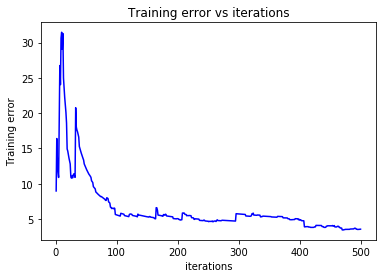

In [658]:
import matplotlib.pyplot as plt 
 
plt.plot(iterations, loss_training, color='blue')
plt.xlabel('iterations')
plt.ylabel('Training error') 
  
# giving a title to my graph 
plt.title('Training error vs iterations') 

# plt.legend()

# function to show the plot 
plt.show()

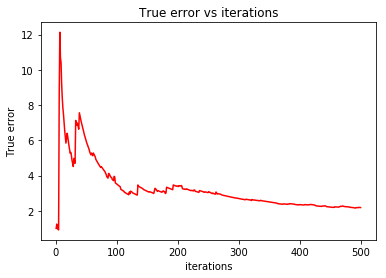

In [661]:
import matplotlib.pyplot as plt 
 
plt.plot(iterations, loss_test, color='red') 
plt.xlabel('iterations')
plt.ylabel('True error') 
  
# giving a title to my graph 
plt.title('True error vs iterations') 

# plt.legend()

# function to show the plot 
plt.show()